In [3]:
import os
os.environ['KMP_DUPLICATE_LIB_OK']='True'
import gym
from epidemic_env.epidemic_env import EpidemicEnv
from stable_baselines3 import PPO
from sb3_contrib import ARS
from stable_baselines3.common.vec_env import DummyVecEnv
from stable_baselines3.common.vec_env import VecNormalize
from stable_baselines3.common.callbacks import BaseCallback
import matplotlib.pyplot as plt
import numpy as np

In [2]:
class TensorboardCallback(BaseCallback):
    """
    Custom callback for plotting additional values in tensorboard.
    """

    def __init__(self, verbose=0):
        super(TensorboardCallback, self).__init__(verbose)

    def _on_step(self) -> bool:                
        self.logger.record('reward', self.training_env.get_attr('total_reward')[0])

        return True

In [11]:
source_file = 'config/switzerland.yaml'



env = VecNormalize(DummyVecEnv([lambda: EpidemicEnv(source_file)]))
model = PPO("MlpPolicy", env, verbose=1, tensorboard_log="./epidemic_log/",learning_rate=0.0001)
model.learn(total_timesteps=40000, log_interval=1,callback=TensorboardCallback())

Using cpu device
Logging to ./epidemic_log/PPO_9
---------------------------------
| reward             | 6.72e+04 |
| time/              |          |
|    fps             | 44       |
|    iterations      | 1        |
|    time_elapsed    | 45       |
|    total_timesteps | 2048     |
---------------------------------
-----------------------------------------
| reward                  | 1.31e+05    |
| time/                   |             |
|    fps                  | 45          |
|    iterations           | 2           |
|    time_elapsed         | 90          |
|    total_timesteps      | 4096        |
| train/                  |             |
|    approx_kl            | 0.009707438 |
|    clip_fraction        | 0.0543      |
|    clip_range           | 0.2         |
|    entropy_loss         | -19.4       |
|    explained_variance   | -0.511      |
|    learning_rate        | 0.0001      |
|    loss                 | 0.0148      |
|    n_updates            | 10          |
|    po

In [12]:
_env = EpidemicEnv(source_file)
obs = env.reset()
obs_buffer = []
action_buffer = []
reward_buffer = []
info_buffer = []
while True:
    action, _states = model.predict(obs, deterministic=True)
    obs, reward, done, info = env.step(action)
    obs_buffer.append(obs)
    action_buffer.append(_env.vec2dict(action[0]))
    reward_buffer.append(reward)
    info_buffer.append(info)
    if done:
      break

In [5]:
obs_buffer[0][0].flatten()

array([-0.3077884 , -0.2995572 , -0.3069912 , -0.30698776, -0.3086166 ,
       -0.30770656, -0.3050018 , -0.33977842, -0.34337267, -0.3425986 ,
       -0.34535387, -0.3488775 , -0.34290937, -0.33909923, -0.06412172,
       -0.06603397, -0.06588496, -0.06756105, -0.06760553, -0.06698364,
       -0.06225784, -0.06839672, -0.07140998, -0.07339167, -0.06809056,
       -0.07057919, -0.07479534, -0.06986982, -0.34983554, -0.356174  ,
       -0.35456842, -0.35154527, -0.3553811 , -0.35087153, -0.35284796,
        0.46139136,  0.32998708,  1.0506752 ,  1.0126882 ,  1.3737785 ,
        3.2044744 ,  2.4266698 , -0.09996863, -0.09927791, -0.10144984,
       -0.10604466, -0.1024236 , -0.10417331, -0.09731882, -0.12315289,
       -0.12041148, -0.11823688, -0.12062095, -0.1238474 , -0.1240099 ,
       -0.12368709, -0.3483847 , -0.35085756, -0.35031047, -0.34802482,
       -0.346928  , -0.34789127, -0.35084045, -0.49467576, -0.49533448,
       -0.49598897, -0.4966317 , -0.49722883, -0.49780253, -0.49

In [13]:
totals = [i[0]['parameters'][0] for i in info_buffer]

In [14]:
confine = [np.sum([ int(b) for (_,b) in a['confinement'].items()]) for a in action_buffer]

In [15]:
dead = [t['dead'] for t in totals]
infected = [t['infected'] for t in totals]
suceptible = [t['suceptible'] for t in totals]
recovered = [t['recovered'] for t in totals]


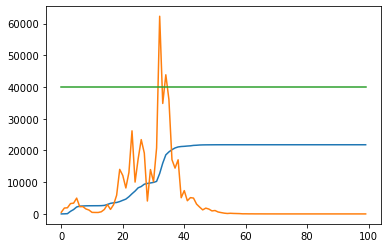

In [16]:
plt.plot(dead)
plt.plot(infected)
plt.plot(np.array(confine)*10000)
# plt.plot(suceptible)
# plt.plot(recovered)